# CARDIAC DISEASE ANALYSIS

In [323]:
import pandas as pd
import matplotlib.pyplot as plt

In [324]:
## Copying so we don't make changes into original
df = pd.read_csv('medical_examination.csv').copy()

In [325]:
df.columns

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [326]:
df.size

910000

In [327]:
df.shape

(70000, 13)

In [328]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [329]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


## CLEANING DATA

In [330]:
## Converting the age, which is in days to years 
df['Age'] = round(df['age'] / 365, 0) 

In [331]:
## Droping age column 
df = df.drop('age', axis='columns')

In [332]:
df.columns

Index(['id', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'Age'],
      dtype='object')

In [333]:
## Checkimg for Null Values
df.isnull().sum()

id             0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
Age            0
dtype: int64

In [334]:
## Creating BMI Column for overweight
df['Overweight'] = round(df['weight'] / (df['height'] / 100) **2, 2).apply(lambda x:1 if x >25 else 0)
df

,id,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,Overweight
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,0
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,1
2,2,1,165,64.0,130,70,3,1,0,0,0,1,52.0,0
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,1
4,4,1,156,56.0,100,60,1,1,0,0,0,0,48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,53.0,1
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,62.0,1
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.0,1
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.0,1


In [335]:
# Fixing Glucose and Chelostrol values to Binary: 1 & 0 
df['cholesterol'] = df.cholesterol.apply(lambda x:1 if x >1 else 0)
df['gluc'] = df.gluc.apply(lambda x:1 if x >1 else 0)
df

,id,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,Overweight
0,0,2,168,62.0,110,80,0,0,0,0,1,0,50.0,0
1,1,1,156,85.0,140,90,1,0,0,0,1,1,55.0,1
2,2,1,165,64.0,130,70,1,0,0,0,0,1,52.0,0
3,3,2,169,82.0,150,100,0,0,0,0,1,1,48.0,1
4,4,1,156,56.0,100,60,0,0,0,0,0,0,48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,0,0,1,0,1,0,53.0,1
69996,99995,1,158,126.0,140,90,1,1,0,0,1,1,62.0,1
69997,99996,2,183,105.0,180,90,1,0,0,1,0,1,52.0,1
69998,99998,1,163,72.0,135,80,0,1,0,0,0,1,61.0,1


In [336]:
df

,id,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,Overweight
0,0,2,168,62.0,110,80,0,0,0,0,1,0,50.0,0
1,1,1,156,85.0,140,90,1,0,0,0,1,1,55.0,1
2,2,1,165,64.0,130,70,1,0,0,0,0,1,52.0,0
3,3,2,169,82.0,150,100,0,0,0,0,1,1,48.0,1
4,4,1,156,56.0,100,60,0,0,0,0,0,0,48.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,0,0,1,0,1,0,53.0,1
69996,99995,1,158,126.0,140,90,1,1,0,0,1,1,62.0,1
69997,99996,2,183,105.0,180,90,1,0,0,1,0,1,52.0,1
69998,99998,1,163,72.0,135,80,0,1,0,0,0,1,61.0,1


In [337]:
## REMOVE Blood Pressure Outliers
df.describe()


,id,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,Overweight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,1.349843,164.359229,74.205690,128.817286,96.630414,0.251643,0.150300,0.088129,0.053771,0.803729,0.499700,53.338686,0.622086
std,28851.302323,0.477253,8.210126,14.395757,154.011419,188.472530,0.433960,0.357368,0.283484,0.225568,0.397179,0.500003,6.765294,0.484870
min,0.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,25006.750000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,48.000000,0.000000
50%,50001.500000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,54.000000,1.000000
75%,74889.250000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,58.000000,1.000000
max,99999.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.000000,1.000000


(array([6.9988e+04, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00]),
 array([ -150.,  1467.,  3084.,  4701.,  6318.,  7935.,  9552., 11169.,
        12786., 14403., 16020.]),
 <BarContainer object of 10 artists>)

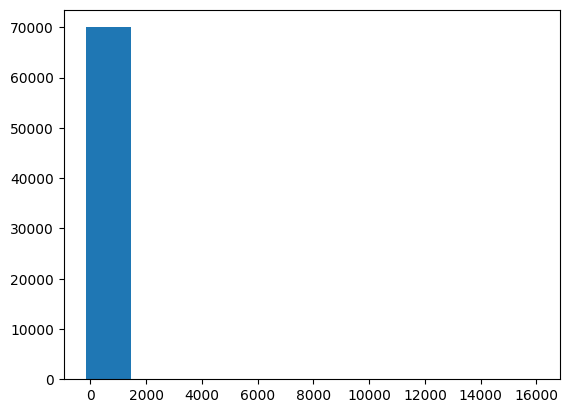

In [338]:
# Not Normal Systolic Blood Pressure
plt.hist(df['ap_hi'])

(array([6.9766e+04, 2.1000e+02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 3.0000e+00, 1.1000e+01, 4.0000e+00, 4.0000e+00]),
 array([  -70.,  1037.,  2144.,  3251.,  4358.,  5465.,  6572.,  7679.,
         8786.,  9893., 11000.]),
 <BarContainer object of 10 artists>)

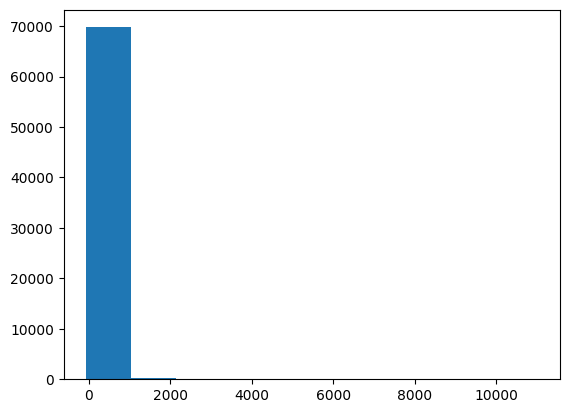

In [339]:
# Not Normal Diastolic Blood Pressure
plt.hist(df['ap_lo'])

In [345]:
df.describe()

,id,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,Overweight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,1.349843,164.359229,74.205690,128.817286,96.630414,0.251643,0.150300,0.088129,0.053771,0.803729,0.499700,53.338686,0.622086
std,28851.302323,0.477253,8.210126,14.395757,154.011419,188.472530,0.433960,0.357368,0.283484,0.225568,0.397179,0.500003,6.765294,0.484870
min,0.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,25006.750000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,48.000000,0.000000
50%,50001.500000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,54.000000,1.000000
75%,74889.250000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,58.000000,1.000000
max,99999.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.000000,1.000000


In [353]:
def blood_pressure_outlier(df, column):
    if df[df[column] < 0][column].min() < 0:
        df[column] = df[column].apply(lambda x:x if x >= 0 else x * - 1)
    if df[df[column] == 0][column].min() == 0:
        df[column] = df[column].apply(lambda x:x if x > 0 else x + 70)
    if df[df[column] < 30][column].min() < 30:
        df[column] = df[column].apply(lambda x:x if x >= 30 else x * 10)
    if df[df[column] > 250][column].max() > 250 :
        df[column] = df[column].apply(lambda x:x if x <= 250 else x / 10)
    if df[df[column] >= 1000][column].max() >= 1000:
        df[column] = df[column].apply(lambda x:x if x <= 999 else x / 10)    
    
    return 
blood_pressure_outlier(df,'ap_lo')
blood_pressure_outlier(df,'ap_hi')


In [354]:
df.describe()

,id,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age,Overweight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,1.349843,164.359229,74.205690,126.994693,81.681043,0.251643,0.150300,0.088129,0.053771,0.803729,0.499700,53.338686,0.622086
std,28851.302323,0.477253,8.210126,14.395757,17.121783,10.134571,0.433960,0.357368,0.283484,0.225568,0.397179,0.500003,6.765294,0.484870
min,0.000000,1.000000,55.000000,10.000000,30.900000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000
25%,25006.750000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,48.000000,0.000000
50%,50001.500000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,54.000000,1.000000
75%,74889.250000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,58.000000,1.000000
max,99999.000000,3.000000,250.000000,200.000000,240.000000,208.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.000000,1.000000


(array([2.0000e+00, 2.1000e+01, 1.1090e+03, 1.1500e+04, 3.7884e+04,
        1.4525e+04, 3.9220e+03, 8.5900e+02, 1.4500e+02, 3.3000e+01]),
 array([ 30.9 ,  51.81,  72.72,  93.63, 114.54, 135.45, 156.36, 177.27,
        198.18, 219.09, 240.  ]),
 <BarContainer object of 10 artists>)

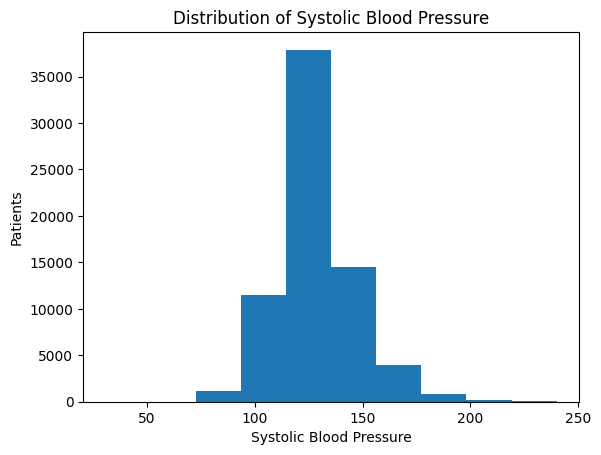

In [357]:
# Systolic Blood Pressure
plt.title("Distribution of Systolic Blood Pressure")
plt.xlabel("Systolic Blood Pressure")
plt.ylabel("Patients")
plt.hist(df['ap_hi'])

(array([2.5000e+01, 2.9380e+03, 4.6096e+04, 1.9929e+04, 6.5900e+02,
        2.7100e+02, 4.2000e+01, 1.5000e+01, 9.0000e+00, 1.6000e+01]),
 array([ 30.  ,  47.88,  65.76,  83.64, 101.52, 119.4 , 137.28, 155.16,
        173.04, 190.92, 208.8 ]),
 <BarContainer object of 10 artists>)

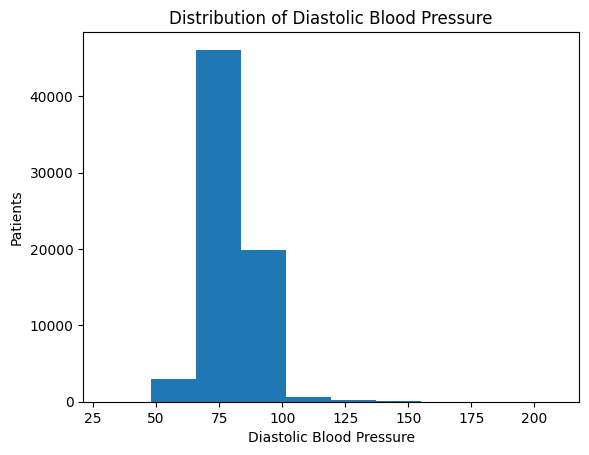

In [358]:
plt.title("Distribution of Diastolic Blood Pressure")
plt.xlabel("Diastolic Blood Pressure")
plt.ylabel("Patients")
plt.hist(df['ap_lo'])

In [ ]:
df.to_csv('medical_clean.csv')

## CLEANED